In [2]:
# load enrgenics-quantlet-import
source("enrgenics-quantlet-import.r")


In [3]:
file = "data/sales_revenue_1.csv"
df = load_eia_data(file)

head(df)

,Year,Month,State,DataStatus,Dates,Cat,Revenue,Sales,Customers,Price,ID
1.RESIDENTIAL,1990,1,AK,Final,7305,RESIDENTIAL,17477,181752,0,9.62,1
2.RESIDENTIAL,1990,1,AL,Final,7305,RESIDENTIAL,123332,2070093,0,5.96,2
3.RESIDENTIAL,1990,1,AR,Final,7305,RESIDENTIAL,72506,1026320,0,7.06,3
4.RESIDENTIAL,1990,1,AZ,Final,7305,RESIDENTIAL,109332,1396499,0,7.83,4
5.RESIDENTIAL,1990,1,CA,Final,7305,RESIDENTIAL,597161,6168009,0,9.68,5
6.RESIDENTIAL,1990,1,CO,Final,7305,RESIDENTIAL,71325,1046805,0,6.81,6


In [18]:
totals = subset(df, DataStatus=="Final")
# tmp = dcast(totals[which(totals$Cat == "TOTAL"),], Year + Month ~ State + Cat, value.var="Sales", fun.aggregate = sum, na.rm = TRUE)
ts_year_by_state = dcast(totals[which(totals$Cat == "TOTAL"),], Year ~ State, value.var="Sales", fun.aggregate = sum)
corr_states = cor(ts_year_by_state[, c(-1,-ncol(ts_year_by_state))])
means_by_state = colMeans(ts_year_by_state[,-1])

corr_states


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
AK,1.0000000,0.9495337,0.9662373,0.9948875,0.9820997,0.9917052,0.7364969,0.9062457,0.8699084,0.9755664,0.9752865,0.8086403,0.9841307,0.8740664,0.9524094,0.9568738,0.9840615,0.9220617,0.8579893,0.9512081,0.7884942,0.1836409,0.8321682,0.9827110,0.9845614,0.9579570,0.4833041,0.9694137,0.8710112,0.9808922,0.9504251,0.9126860,0.9852060,0.9923296,0.8800155,0.2319033,0.9650621,0.5690982,0.9736233,0.9431799,0.9361856,0.9549093,0.9239094,0.9642090,0.9830083,0.9814056,0.8608585,-0.1054376,0.9462762,0.9585899
AL,0.9495337,1.0000000,0.9901927,0.9611285,0.9506780,0.9505871,0.8266778,0.8761500,0.9353804,0.9789073,0.9886518,0.8738359,0.9618632,0.8895688,0.9850445,0.9918575,0.9793027,0.9269045,0.8916801,0.9525961,0.8689008,0.3645466,0.9438098,0.9742951,0.9722836,0.9835389,0.4385005,0.9847064,0.7875869,0.9375955,0.9392031,0.9200804,0.9481786,0.9707274,0.9177733,0.4460461,0.9134499,0.6571381,0.9722199,0.9515005,0.9945323,0.8722251,0.9809272,0.9416076,0.9318183,0.9744823,0.9457072,-0.1592488,0.9906518,0.9349695
AR,0.9662373,0.9901927,1.0000000,0.9729564,0.9549537,0.9730675,0.7856040,0.8803781,0.9324800,0.9831672,0.9910602,0.8457190,0.9800225,0.8872505,0.9895817,0.9919613,0.9915623,0.9332630,0.9095590,0.9546642,0.8617782,0.3099828,0.9251577,0.9877151,0.9855228,0.9916670,0.3991984,0.9919640,0.8252447,0.9660951,0.9387807,0.9122446,0.9710977,0.9799030,0.9157095,0.3954518,0.9399979,0.6270001,0.9782651,0.9496118,0.9866286,0.9091000,0.9632955,0.9653624,0.9565993,0.9840211,0.9217872,-0.1559510,0.9881106,0.9335224
AZ,0.9948875,0.9611285,0.9729564,1.0000000,0.9848391,0.9924577,0.7486650,0.8988325,0.8813277,0.9789284,0.9792683,0.8159149,0.9909945,0.8896312,0.9584546,0.9670756,0.9885677,0.9157419,0.8748229,0.9512265,0.7963498,0.2254483,0.8477452,0.9898929,0.9892041,0.9654081,0.4837866,0.9764145,0.8818362,0.9827690,0.9517421,0.9084718,0.9889116,0.9971010,0.8930654,0.2611340,0.9664030,0.6078797,0.9805357,0.9440476,0.9479800,0.9563053,0.9344595,0.9725580,0.9871016,0.9860152,0.8784201,-0.1218717,0.9582535,0.9689831
CA,0.98209971,0.95067796,0.95495375,0.98483913,1.00000000,0.97102397,0.75333705,0.88319196,0.86851620,0.96479177,0.96728010,0.81489814,0.96522240,0.87678558,0.93932895,0.94582576,0.97495696,0.88504085,0.83308561,0.94457307,0.76738642,0.27780459,0.83658754,0.96759896,0.97034977,0.94756688,0.47120264,0.95672008,0.84275765,0.95536798,0.94943360,0.90238326,0.96159528,0.98167396,0.88300473,0.26027128,0.95442938,0.60077962,0.95782402,0.93889749,0.93893415,0.92089944,0.93538667,0.95290479,0.96298009,0.96286897,0.87929639,-0.09801336,0.94176266,0.94957838
CO,0.9917052,0.9505871,0.9730675,0.9924577,0.9710240,1.0000000,0.7138725,0.8934570,0.8850713,0.9769599,0.9767883,0.7872127,0.9946926,0.8637525,0.9538406,0.9606824,0.9895323,0.9109708,0.8930522,0.9524404,0.8083780,0.1768124,0.8329201,0.9899629,0.9875415,0.9689168,0.4415854,0.9774186,0.9022735,0.9941519,0.9488276,0.8954085,0.9910225,0.9901577,0.8989308,0.2123588,0.9774964,0.5507434,0.9750761,0.9416763,0.9419296,0.9702139,0.9186926,0.9826650,0.9914111,0.9866325,0.8479545,-0.1293140,0.9492616,0.9491097
CT,0.7364969,0.8266778,0.7856040,0.7486650,0.7533371,0.7138725,1.0000000,0.8309890,0.8776104,0.8247820,0.8070285,0.9312793,0.7156997,0.6040320,0.8272640,0.8328485,0.7669093,0.8224115,0.5354478,0.8672434,0.8875313,0.5126131,0.8855818,0.7670605,0.7573831,0.7533947,0.2939862,0.7766823,0.4370744,0.6677417,0.8548660,0.9072192,0.6757402,0.7724658,0.8560573,0.4604843,0.6241335,0.4421155,0.8175090,0.8861277,0.8344090,0.5614827,0.8908568,0.6453147,0.6542359,0.7780371,0.8716441,-0.4962908,0.8457267,0.7440319
DC,0.9062457,0.8761500,0.8803781,0.8988325,0.8831920,0.8934570,0.8309890,1.0000000,0.8354072,0.9179950,0.9113049,0.8522121,0.8787216,0.6709675,0.8974227,0.8944532,0.8986509,0.9095714,0.6798172,0.9386588,0.8195490,0.2064044,0.7750263,0.8973626,0.9111790,0.8430546,0.457479

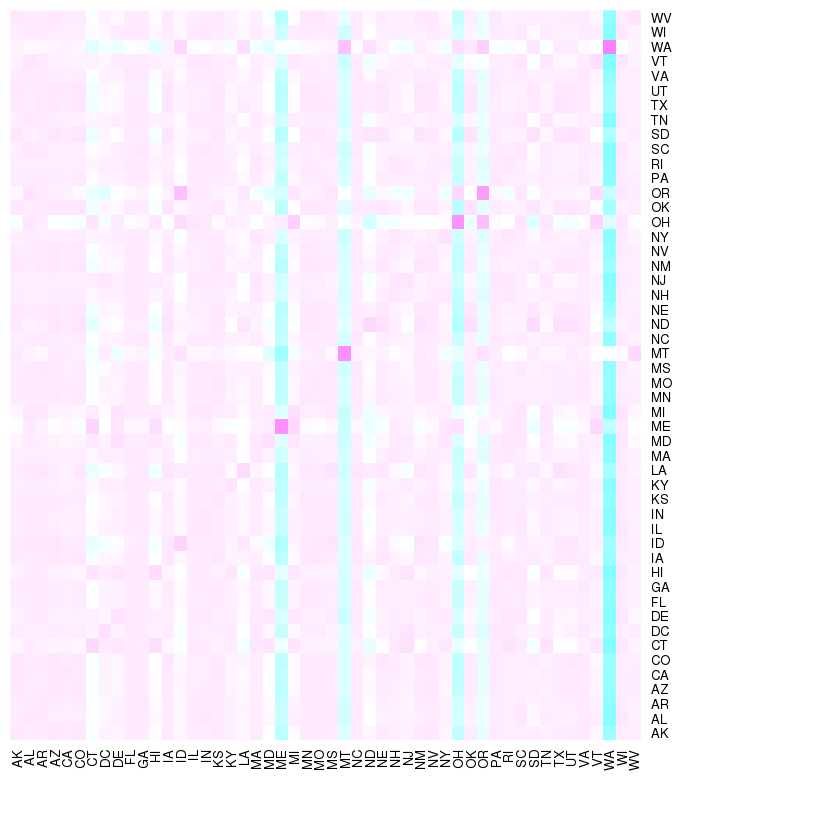

In [20]:
heatmap(corr_states, Rowv=NA, Colv=NA, col = cm.colors(256), margins=c(5,10))

[1] "/home/ubuntu/miniconda3/lib64/R/library"

character(0)

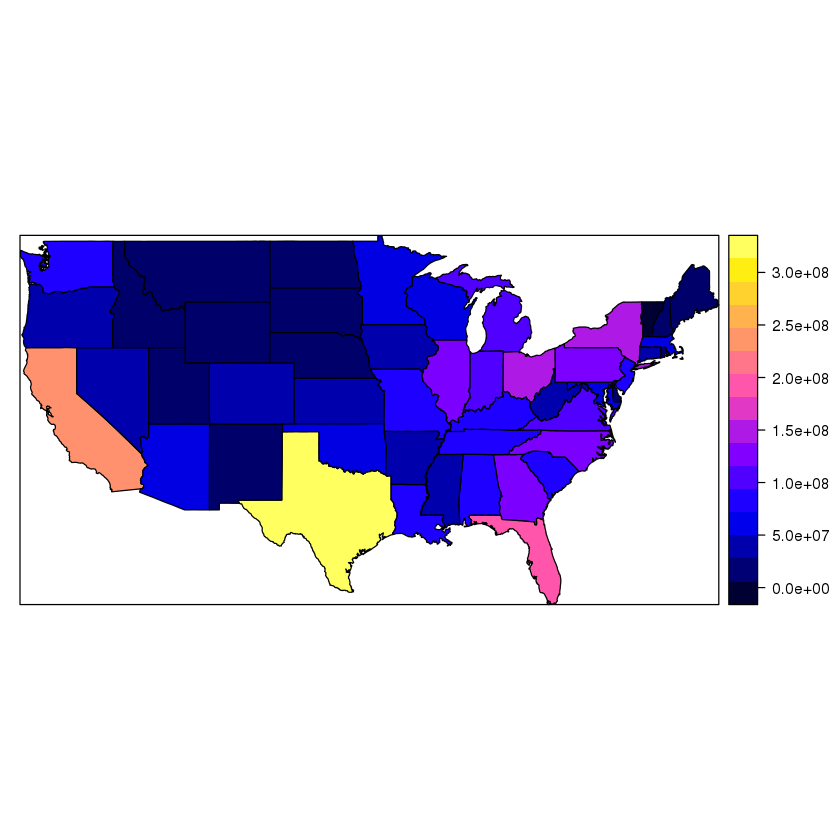

In [16]:
# consider weather data
# https://ram-n.github.io/weatherData/

# mapping without advanced libs
# http://stackoverflow.com/questions/24441775/how-do-you-create-a-us-states-heatmap-based-on-some-values

library(MASS)
library(maps)
library(maptools)
library(sp)

permit = gpclibPermit()
means_df = data.frame(means_by_state)
dat = means_df
dat$states <- tolower(state.name[match(rownames(dat),  state.abb)])
mapUSA <- map('state',  fill = TRUE,  plot = FALSE)
nms <- sapply(strsplit(mapUSA$names,  ':'),  function(x){x[1]})
USApolygons <- map2SpatialPolygons(mapUSA,  IDs = nms,  CRS('+proj=longlat'))

idx <- match(unique(nms),  dat$states)
dat2 <- data.frame(value = dat$means_by_state[idx], state = unique(nms))
row.names(dat2) <- unique(nms)
USAsp <- SpatialPolygonsDataFrame(USApolygons,  data = dat2)
    
spplot(USAsp['value'])
# https://www.census.gov/popest/data/datasets.html
# https://docs.google.com/spreadsheets/d/1JsV5bNnFoE-4xapsnrpqRP-5wgTkpDjgC0SXKW8zgPI/edit#gid=0